In [1]:
import numpy as np
import matplotlib.pyplot as plt

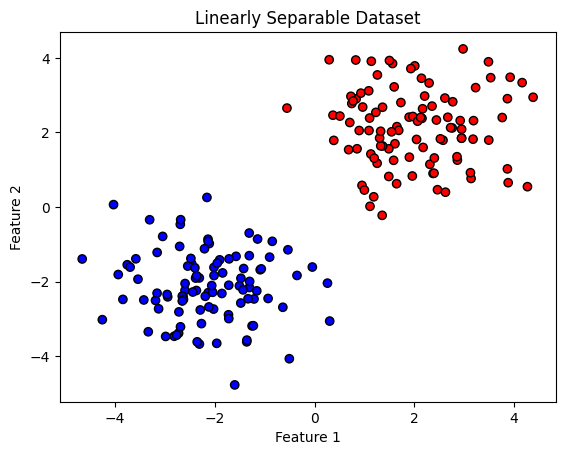

In [2]:
np.random.seed(0)  # For reproducibility

num_samples = 100  # Number of points per class

# Class 1 (centered at [2,2])
X1 = np.random.randn(num_samples, 2) + np.array([2, 2])

# Class 2 (centered at [-2,-2])
X2 = np.random.randn(num_samples, 2) + np.array([-2, -2])

# Combine both classes
X = np.vstack((X1, X2))

# Labels (1 for class 1, 0 for class 2)
y = np.hstack((np.ones(num_samples), np.zeros(num_samples)))

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
# Initialize weights (random values)
W = np.random.randn(2)  # 2D weights since input has 2 features
b = np.random.randn()   # Bias

# Set hyperparameters
learning_rate = 0.01
epochs = 1000  # Number of training iterations


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [5]:
# Training loop
for epoch in range(epochs):
    # Forward propagation
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)
    
    # Compute loss (Binary Cross Entropy)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    # Compute gradients
    dz = y_pred - y
    dW = np.dot(X.T, dz) / len(y)
    db = np.mean(dz)
    
    # Update weights and bias
    W -= learning_rate * dW
    b -= learning_rate * db
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("Training complete!")


Epoch 0, Loss: 3.6796
Epoch 100, Loss: 0.2779
Epoch 200, Loss: 0.1155
Epoch 300, Loss: 0.0753
Epoch 400, Loss: 0.0569
Epoch 500, Loss: 0.0463
Epoch 600, Loss: 0.0393
Epoch 700, Loss: 0.0343
Epoch 800, Loss: 0.0306
Epoch 900, Loss: 0.0277
Training complete!


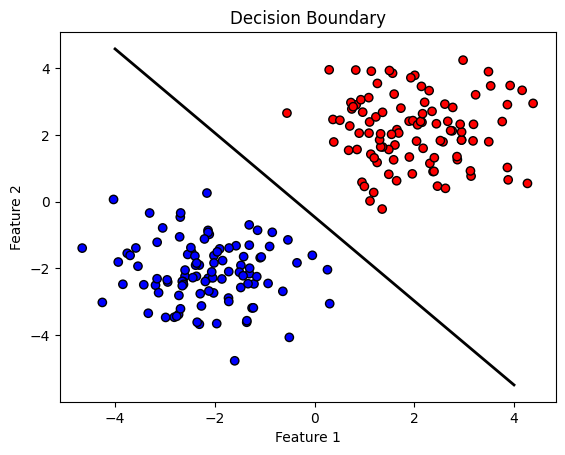

In [6]:
# Create decision boundary
x_values = np.linspace(-4, 4, 100)
y_values = -(W[0] * x_values + b) / W[1]

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.plot(x_values, y_values, 'k-', linewidth=2)  # Decision boundary
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [13]:
def predict(X_new):
    z = np.dot(X_new, W) + b
    return (sigmoid(z) >= 0.5).astype(int)  # Returns 0 or 1

# Example test points
test_points = np.array([[3, 3], [-3, -3], [-4, 3]])
predictions = predict(test_points)

# Print results
for i, point in enumerate(test_points):
    print(f"Point {point} => Predicted Class: {predictions[i]}")


Point [3 3] => Predicted Class: 1
Point [-3 -3] => Predicted Class: 0
Point [-4  3] => Predicted Class: 0


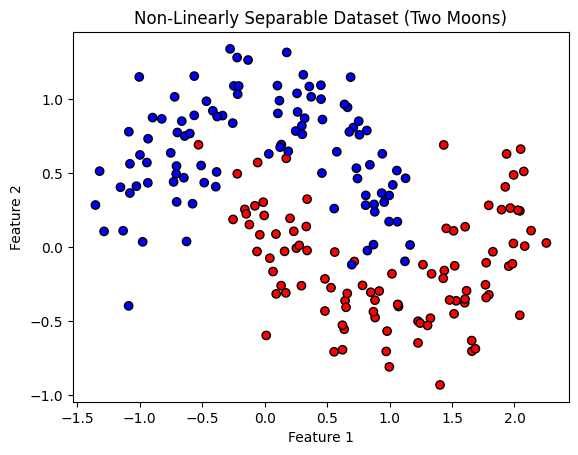

In [18]:
# Generate non-linearly separable dataset
np.random.seed(0)
X, y = make_moons(n_samples=200, noise=0.2)  # 200 points, with noise

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("Non-Linearly Separable Dataset (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [19]:
# Initialize parameters
W = np.random.randn(2)  # Weights (2 features)
b = np.random.randn()   # Bias
learning_rate = 0.01
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [20]:
# Training loop (Same as before)
for epoch in range(epochs):
    # Forward propagation
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)
    
    # Compute loss (Binary Cross Entropy)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    # Compute gradients
    dz = y_pred - y
    dW = np.dot(X.T, dz) / len(y)
    db = np.mean(dz)
    
    # Update weights and bias
    W -= learning_rate * dW
    b -= learning_rate * db
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("Training complete!")

Epoch 0, Loss: 1.0552
Epoch 100, Loss: 0.8603
Epoch 200, Loss: 0.7282
Epoch 300, Loss: 0.6387
Epoch 400, Loss: 0.5764
Epoch 500, Loss: 0.5317
Epoch 600, Loss: 0.4986
Epoch 700, Loss: 0.4734
Epoch 800, Loss: 0.4537
Epoch 900, Loss: 0.4379
Training complete!


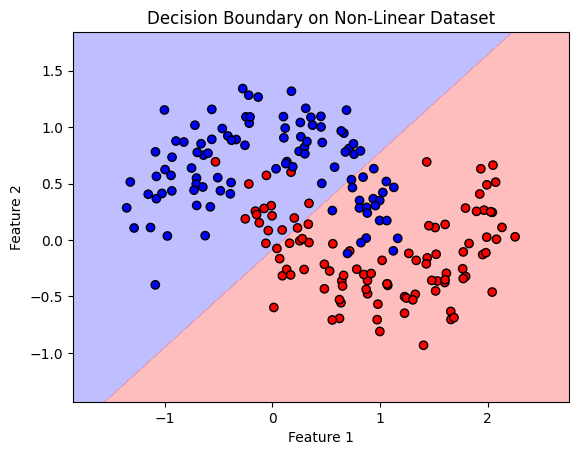

In [21]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Compute predictions
Z = sigmoid(W[0] * xx + W[1] * yy + b)
Z = Z.reshape(xx.shape)

# Plot contour and data points
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("Decision Boundary on Non-Linear Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

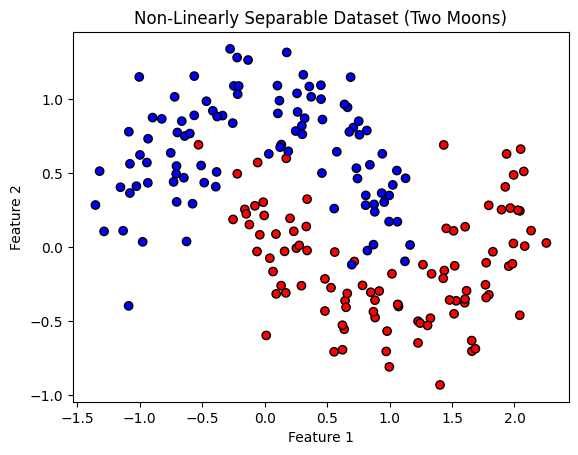

In [22]:
# Generate non-linearly separable dataset
np.random.seed(0)
X, y = make_moons(n_samples=200, noise=0.2)  # 200 points, with some noise

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("Non-Linearly Separable Dataset (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [31]:
# Define the neural network structure
input_size = 2  # Two features in input
hidden_size = 5  # Five neurons in hidden layer
output_size = 1  # Binary classification (1 output neuron)
learning_rate = 0.01
epochs = 5000

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)  # Weights for input -> hidden
b1 = np.zeros((1, hidden_size))  # Bias for hidden layer
W2 = np.random.randn(hidden_size, output_size)  # Weights for hidden -> output
b2 = np.zeros((1, output_size))  # Bias for output layer

In [32]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)


In [33]:
# Training loop
for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(X, W1) + b1  # Input to hidden layer
    A1 = relu(Z1)  # Activation of hidden layer
    Z2 = np.dot(A1, W2) + b2  # Input to output layer
    A2 = sigmoid(Z2)  # Output activation (Sigmoid)

    # Compute loss (Binary Cross Entropy)
    loss = -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))

    # Backpropagation
    dA2 = A2 - y.reshape(-1, 1)  # Derivative of loss w.r.t. output
    dW2 = np.dot(A1.T, dA2) / len(y)
    db2 = np.mean(dA2, axis=0)

    dA1 = np.dot(dA2, W2.T) * relu_derivative(Z1)
    dW1 = np.dot(X.T, dA1) / len(y)
    db1 = np.mean(dA1, axis=0)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("Training complete!")

Epoch 0, Loss: 1.1341
Epoch 500, Loss: 1.1122
Epoch 1000, Loss: 1.2141
Epoch 1500, Loss: 1.2974
Epoch 2000, Loss: 1.3586
Epoch 2500, Loss: 1.4013
Epoch 3000, Loss: 1.4327
Epoch 3500, Loss: 1.4564
Epoch 4000, Loss: 1.4747
Epoch 4500, Loss: 1.4918
Training complete!


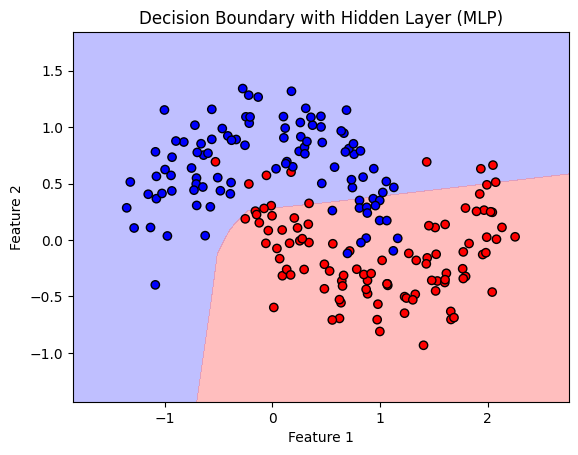

In [34]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Compute predictions
Z1 = np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2
Z = sigmoid(Z2)
Z = Z.reshape(xx.shape)

# Plot contour and dataset
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("Decision Boundary with Hidden Layer (MLP)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Epoch 0, Loss: 1.1759
Epoch 500, Loss: 1.0237
Epoch 1000, Loss: 1.2387
Epoch 1500, Loss: 1.3315
Epoch 2000, Loss: 1.3754
Epoch 2500, Loss: 1.3973
Epoch 3000, Loss: 1.4091
Epoch 3500, Loss: 1.4174
Epoch 4000, Loss: 1.4237
Epoch 4500, Loss: 1.4305
Epoch 5000, Loss: 1.4350
Epoch 5500, Loss: 1.4408
Epoch 6000, Loss: 1.4490
Epoch 6500, Loss: 1.4563
Epoch 7000, Loss: 1.4642
Epoch 7500, Loss: 1.4761
Epoch 8000, Loss: 1.4924
Epoch 8500, Loss: 1.5045
Epoch 9000, Loss: 1.5174
Epoch 9500, Loss: 1.5315
Training complete!


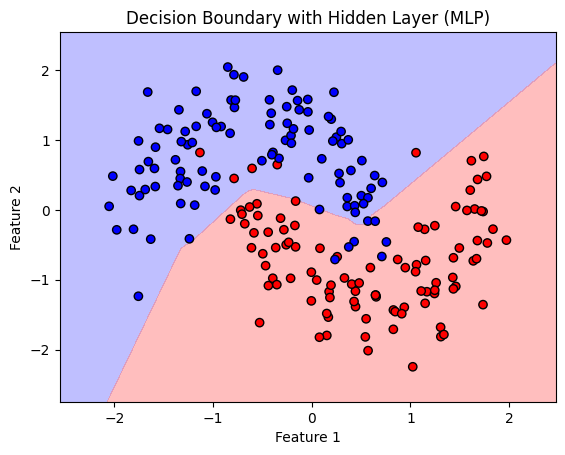

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate non-linearly separable dataset
np.random.seed(0)
X, y = make_moons(n_samples=200, noise=0.2)

# Normalize input features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Define neural network structure
input_size = 2
hidden_size = 10
output_size = 1
learning_rate = 0.01  # Reduced learning rate
epochs = 10000

# Initialize weights using He initialization
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Training loop
for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute loss (Binary Cross Entropy)
    loss = -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))  # Avoid log(0)

    # Backpropagation
    dA2 = A2 - y.reshape(-1, 1)  # Gradient of loss wrt output
    dW2 = np.dot(A1.T, dA2) / len(y)
    db2 = np.mean(dA2, axis=0)

    dA1 = np.dot(dA2, W2.T) * relu_derivative(Z1)
    dW1 = np.dot(X.T, dA1) / len(y)
    db1 = np.mean(dA1, axis=0)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("Training complete!")

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Compute predictions
Z1 = np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2
Z = sigmoid(Z2)
Z = Z.reshape(xx.shape)

# Plot contour and dataset
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="bwr", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("Decision Boundary with Hidden Layer (MLP)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
